# Random Forest Regressor Model

## Import dependency and Load Dataset

In [1]:
# Import the dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
crypto_df = pd.read_csv("resources/train.csv")
crypto_df.head(10)

timestamp  Asset_ID  Count          Open        High         Low  \
0  1514764860         2   40.0   2376.580000   2399.5000   2357.1400   
1  1514764860         0    5.0      8.530000      8.5300      8.5300   
2  1514764860         1  229.0  13835.194000  14013.8000  13666.1100   
3  1514764860         5   32.0      7.659600      7.6596      7.6567   
4  1514764860         7    5.0     25.920000     25.9200     25.8740   
5  1514764860         6  173.0    738.302500    746.0000    732.5100   
6  1514764860         9  167.0    225.330000    227.7800    222.9800   
7  1514764860        11    7.0    329.090000    329.8800    329.0900   
8  1514764920         2   53.0   2374.553333   2400.9000   2354.2000   
9  1514764920         0    7.0      8.530000      8.5300      8.5145   

          Close       Volume          VWAP    Target  
0   2374.590000    19.233005   2373.116392 -0.004218  
1      8.530000    78.380000      8.530000 -0.014399  
2  13850.176000    31.550062  13827.062093 -0.014643  
3      7.657600  6626.713370      7.657713 -0.013922  
4     25.877000   121.087310     25.891363 -0.008264  
5    738.507500   335.987856    738.839291 -0.004809  
6    225.206667   411.896642    225.197944 -0.009791  
7    329.460000     6.635710    329.454118       NaN  
8   2372.286667    24.050259   2371.434498 -0.004079  
9      8.514500    71.390000      8.520215 -0.015875

In [3]:
asset_df = pd.read_csv('resources/asset_details.csv')
asset_df.sort_values(by='Asset_ID',ascending=True)

Asset_ID    Weight        Asset_Name
1          0  4.304065      Binance Coin
2          1  6.779922           Bitcoin
0          2  2.397895      Bitcoin Cash
10         3  4.406719           Cardano
13         4  3.555348          Dogecoin
3          5  1.386294            EOS.IO
5          6  5.894403          Ethereum
4          7  2.079442  Ethereum Classic
11         8  1.098612              IOTA
6          9  2.397895          Litecoin
12        10  1.098612             Maker
7         11  1.609438            Monero
9         12  2.079442           Stellar
8         13  1.791759              TRON

## Cleaning the data

In [4]:
# Check for missing data
crypto_df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   timestamp  24236806 non-null  int64  
 1   Asset_ID   24236806 non-null  int64  
 2   Count      24236806 non-null  float64
 3   Open       24236806 non-null  float64
 4   High       24236806 non-null  float64
 5   Low        24236806 non-null  float64
 6   Close      24236806 non-null  float64
 7   Volume     24236806 non-null  float64
 8   VWAP       24236797 non-null  float64
 9   Target     23486468 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [5]:
# Check missing values in each column
crypto_df.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [6]:
# Replace NaN values with zeros in Target column
crypto_df["Target"] = crypto_df["Target"].fillna(0)
crypto_df.head(10)

timestamp  Asset_ID  Count          Open        High         Low  \
0  1514764860         2   40.0   2376.580000   2399.5000   2357.1400   
1  1514764860         0    5.0      8.530000      8.5300      8.5300   
2  1514764860         1  229.0  13835.194000  14013.8000  13666.1100   
3  1514764860         5   32.0      7.659600      7.6596      7.6567   
4  1514764860         7    5.0     25.920000     25.9200     25.8740   
5  1514764860         6  173.0    738.302500    746.0000    732.5100   
6  1514764860         9  167.0    225.330000    227.7800    222.9800   
7  1514764860        11    7.0    329.090000    329.8800    329.0900   
8  1514764920         2   53.0   2374.553333   2400.9000   2354.2000   
9  1514764920         0    7.0      8.530000      8.5300      8.5145   

          Close       Volume          VWAP    Target  
0   2374.590000    19.233005   2373.116392 -0.004218  
1      8.530000    78.380000      8.530000 -0.014399  
2  13850.176000    31.550062  13827.062093 -0.014643  
3      7.657600  6626.713370      7.657713 -0.013922  
4     25.877000   121.087310     25.891363 -0.008264  
5    738.507500   335.987856    738.839291 -0.004809  
6    225.206667   411.896642    225.197944 -0.009791  
7    329.460000     6.635710    329.454118  0.000000  
8   2372.286667    24.050259   2371.434498 -0.004079  
9      8.514500    71.390000      8.520215 -0.015875

In [7]:
# Show all rows with NaN values in VWAP column
crypto_df[crypto_df["VWAP"].isnull()]

timestamp  Asset_ID  Count    Open    High     Low   Close  Volume  \
15004269  1592173560        10    2.0  501.00  501.00  501.00  501.00     0.0   
15004283  1592173620        10    4.0  501.00  501.00  501.00  501.00     0.0   
15059232  1592426160        10    2.0  529.77  529.77  529.77  529.77     0.0   
15143187  1592823720        10    2.0  503.60  503.60  503.60  503.60     0.0   
15183088  1593008940        10    2.0  484.16  484.16  484.16  484.16     0.0   
15184216  1593013920        10    2.0  480.00  480.00  480.00  480.00     0.0   
15184243  1593014040        10    2.0  480.00  480.00  480.00  480.00     0.0   
15184309  1593014340        10    6.0  479.07  479.07  479.07  479.07     0.0   
15184778  1593016440        10    4.0  478.00  478.00  475.00  478.00     0.0   

          VWAP    Target  
15004269   NaN  0.000000  
15004283   NaN  0.000000  
15059232   NaN  0.007356  
15143187   NaN -0.005672  
15183088   NaN -0.004281  
15184216   NaN  0.000000  
15184243   NaN  0.000000  
15184309   NaN  0.000000  
15184778   NaN  0.000000

In [8]:
# Fill time gaps with reindex() method
BNB = crypto_df[crypto_df["Asset_ID"]==0].set_index("timestamp")
BNB = BNB.reindex(range(BNB.index[0],BNB.index[-1]+60,60),method='pad')
(BNB.index[1:]-BNB.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [9]:
BTC = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp")
BTC = BTC.reindex(range(BTC.index[0],BTC.index[-1]+60,60),method='pad')
(BTC.index[1:]-BTC.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [10]:
BCH = crypto_df[crypto_df["Asset_ID"]==2].set_index("timestamp")
BCH = BCH.reindex(range(BCH.index[0],BCH.index[-1]+60,60),method='pad')
(BCH.index[1:]-BCH.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [11]:
ADA = crypto_df[crypto_df["Asset_ID"]==3].set_index("timestamp")
ADA = ADA.reindex(range(ADA.index[0],ADA.index[-1]+60,60),method='pad')
(ADA.index[1:]-ADA.index[:-1]).value_counts()

60    1803769
Name: timestamp, dtype: int64

In [12]:
DOGE = crypto_df[crypto_df["Asset_ID"]==4].set_index("timestamp")
DOGE = DOGE.reindex(range(DOGE.index[0],DOGE.index[-1]+60,60),method='pad')
(DOGE.index[1:]-DOGE.index[:-1]).value_counts()

60    1285046
Name: timestamp, dtype: int64

In [13]:
EOS = crypto_df[crypto_df["Asset_ID"]==5].set_index("timestamp")
EOS = EOS.reindex(range(EOS.index[0],EOS.index[-1]+60,60),method='pad')
(EOS.index[1:]-EOS.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [14]:
ETH = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp")
ETH = ETH.reindex(range(ETH.index[0],ETH.index[-1]+60,60),method='pad')
(ETH.index[1:]-ETH.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [15]:
ETC = crypto_df[crypto_df["Asset_ID"]==7].set_index("timestamp")
ETC = ETC.reindex(range(ETC.index[0],ETC.index[-1]+60,60),method='pad')
(ETC.index[1:]-ETC.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [16]:
MIOTA = crypto_df[crypto_df["Asset_ID"]==8].set_index("timestamp")
MIOTA = MIOTA.reindex(range(MIOTA.index[0],MIOTA.index[-1]+60,60),method='pad')
(MIOTA.index[1:]-MIOTA.index[:-1]).value_counts()

60    1772153
Name: timestamp, dtype: int64

In [17]:
LTC = crypto_df[crypto_df["Asset_ID"]==9].set_index("timestamp")
LTC = LTC.reindex(range(LTC.index[0],LTC.index[-1]+60,60),method='pad')
(LTC.index[1:]-LTC.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [18]:
MKR = crypto_df[crypto_df["Asset_ID"]==10].set_index("timestamp")
MKR = MKR.reindex(range(MKR.index[0],MKR.index[-1]+60,60),method='pad')
(MKR.index[1:]-MKR.index[:-1]).value_counts()

60    1770279
Name: timestamp, dtype: int64

In [19]:
XMR = crypto_df[crypto_df["Asset_ID"]==11].set_index("timestamp")
XMR = XMR.reindex(range(XMR.index[0],XMR.index[-1]+60,60),method='pad')
(XMR.index[1:]-XMR.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [20]:
XLM = crypto_df[crypto_df["Asset_ID"]==12].set_index("timestamp")
XLM = XLM.reindex(range(XLM.index[0],XLM.index[-1]+60,60),method='pad')
(XLM.index[1:]-XLM.index[:-1]).value_counts()

60    1889287
Name: timestamp, dtype: int64

In [21]:
TRX = crypto_df[crypto_df["Asset_ID"]==13].set_index("timestamp")
TRX = TRX.reindex(range(TRX.index[0],TRX.index[-1]+60,60),method='pad')
(TRX.index[1:]-TRX.index[:-1]).value_counts()

60    1903823
Name: timestamp, dtype: int64

In [22]:
# Merge dataset for chosen assets
frames = [BNB, BTC, EOS, ETH, LTC, XMR]
crypto_con_df = pd.concat(frames)
crypto_con_df.head(10)

Asset_ID  Count    Open    High     Low   Close   Volume  \
timestamp                                                              
1514764860         0    5.0  8.5300  8.5300  8.5300  8.5300    78.38   
1514764920         0    7.0  8.5300  8.5300  8.5145  8.5145    71.39   
1514764980         0   45.0  8.5065  8.5299  8.4848  8.4848  1546.82   
1514765040         0   14.0  8.5009  8.5066  8.4744  8.5009   125.80   
1514765100         0    5.0  8.5007  8.5007  8.4560  8.4560   125.01   
1514765160         0   89.0  8.4560  8.4560  8.3999  8.4000  3765.25   
1514765220         0   20.0  8.4000  8.4000  8.3800  8.3958   827.17   
1514765280         0   25.0  8.3800  8.4544  8.3800  8.3804   370.04   
1514765340         0   16.0  8.3999  8.4519  8.3800  8.3800  1428.91   
1514765400         0    1.0  8.3932  8.3932  8.3932  8.3932    12.00   

                VWAP    Target  
timestamp                       
1514764860  8.530000 -0.014399  
1514764920  8.520215 -0.015875  
1514764980  8.501394 -0.015410  
1514765040  8.479810 -0.012524  
1514765100  8.458435 -0.005940  
1514765160  8.403468 -0.005455  
1514765220  8.390564 -0.000644  
1514765280  8.390332 -0.003580  
1514765340  8.400632 -0.005421  
1514765400  8.393200 -0.005123

In [23]:
# Use timestamp to sort the values
crypto_con_df = crypto_con_df.sort_index()
crypto_con_df.head(10)

Asset_ID  Count        Open        High         Low         Close  \
timestamp                                                                       
1514764860         0    5.0      8.5300      8.5300      8.5300      8.530000   
1514764860         9  167.0    225.3300    227.7800    222.9800    225.206667   
1514764860         6  173.0    738.3025    746.0000    732.5100    738.507500   
1514764860         5   32.0      7.6596      7.6596      7.6567      7.657600   
1514764860         1  229.0  13835.1940  14013.8000  13666.1100  13850.176000   
1514764860        11    7.0    329.0900    329.8800    329.0900    329.460000   
1514764920        11    1.0    329.4500    329.4500    329.4500    329.450000   
1514764920         6  192.0    738.5075    745.1400    732.4900    738.260000   
1514764920         1  235.0  13835.0360  14052.3000  13680.0000  13828.102000   
1514764920         5   10.0      7.6568      7.6569      7.6567      7.656700   

                 Volume          VWAP    Target  
timestamp                                        
1514764860    78.380000      8.530000 -0.014399  
1514764860   411.896642    225.197944 -0.009791  
1514764860   335.987856    738.839291 -0.004809  
1514764860  6626.713370      7.657713 -0.013922  
1514764860    31.550062  13827.062093 -0.014643  
1514764860     6.635710    329.454118  0.000000  
1514764920     0.349420    329.450000 -0.009690  
1514764920   232.793141    738.268967 -0.004441  
1514764920    31.046432  13840.362591 -0.015037  
1514764920  3277.475494      7.656749 -0.014534

In [24]:
beg_crypto = crypto_con_df.index[0].astype('datetime64[s]')
end_crypto = crypto_con_df.index[-1].astype('datetime64[s]')

print('Cryptocurrency data goes from ', beg_crypto, 'to ', end_crypto)

Cryptocurrency data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


In [25]:
crypto_con_df.index[7793280].astype('datetime64[s]')

numpy.datetime64('2020-06-21T00:01:00')

In [26]:
crypto_con_df = crypto_con_df.iloc[7793280:]
crypto_con_df.head(10)

Asset_ID  Count         Open         High        Low        Close  \
timestamp                                                                       
1592697660         5  435.0     2.540683     2.547300     2.5387     2.542350   
1592697660        11    6.0    64.090000    64.110000    64.0900    64.110000   
1592697660         1  504.0  9364.227143  9378.100000  9359.9800  9366.225714   
1592697660         0   22.0    16.068600    16.077500    16.0682    16.069700   
1592697660         9  125.0    43.651500    43.670000    43.6400    43.657500   
1592697660         6  424.0   229.055000   229.459933   228.9100   229.154989   
1592697720        11   12.0    64.120000    64.120000    64.1000    64.110000   
1592697720         9   36.0    43.661000    43.680000    43.6400    43.667200   
1592697720         6  289.0   229.134596   229.437578   229.0100   229.161263   
1592697720         0   46.0    16.067300    16.072600    16.0648    16.066900   

                  Volume         VWAP    Target  
timestamp                                        
1592697660  80796.575643     2.542050 -0.002344  
1592697660     23.654590    64.093652 -0.002652  
1592697660     15.768265  9365.439427 -0.000791  
1592697660    290.890000    16.070634  0.005875  
1592697660    738.758489    43.656948 -0.000662  
1592697660   1300.092998   229.136591 -0.000949  
1592697720     63.852110    64.107327 -0.003044  
1592697720    118.165684    43.664316 -0.000395  
1592697720    239.642529   229.138053 -0.000677  
1592697720    481.530000    16.068496  0.003569

In [27]:
print(datetime.utcfromtimestamp(1592697660))

2020-06-21 00:01:00


In [28]:
# Reset index
crypto_con_df.reset_index(inplace=True)
crypto_con_df.head(10)

timestamp  Asset_ID  Count         Open         High        Low  \
0  1592697660         5  435.0     2.540683     2.547300     2.5387   
1  1592697660        11    6.0    64.090000    64.110000    64.0900   
2  1592697660         1  504.0  9364.227143  9378.100000  9359.9800   
3  1592697660         0   22.0    16.068600    16.077500    16.0682   
4  1592697660         9  125.0    43.651500    43.670000    43.6400   
5  1592697660         6  424.0   229.055000   229.459933   228.9100   
6  1592697720        11   12.0    64.120000    64.120000    64.1000   
7  1592697720         9   36.0    43.661000    43.680000    43.6400   
8  1592697720         6  289.0   229.134596   229.437578   229.0100   
9  1592697720         0   46.0    16.067300    16.072600    16.0648   

         Close        Volume         VWAP    Target  
0     2.542350  80796.575643     2.542050 -0.002344  
1    64.110000     23.654590    64.093652 -0.002652  
2  9366.225714     15.768265  9365.439427 -0.000791  
3    16.069700    290.890000    16.070634  0.005875  
4    43.657500    738.758489    43.656948 -0.000662  
5   229.154989   1300.092998   229.136591 -0.000949  
6    64.110000     63.852110    64.107327 -0.003044  
7    43.667200    118.165684    43.664316 -0.000395  
8   229.161263    239.642529   229.138053 -0.000677  
9    16.066900    481.530000    16.068496  0.003569

In [29]:
# Convert the timestamp
crypto_con_df['date'] = pd.to_datetime(crypto_con_df['timestamp'], unit='s')
crypto_con_df.head(10)

timestamp  Asset_ID  Count         Open         High        Low  \
0  1592697660         5  435.0     2.540683     2.547300     2.5387   
1  1592697660        11    6.0    64.090000    64.110000    64.0900   
2  1592697660         1  504.0  9364.227143  9378.100000  9359.9800   
3  1592697660         0   22.0    16.068600    16.077500    16.0682   
4  1592697660         9  125.0    43.651500    43.670000    43.6400   
5  1592697660         6  424.0   229.055000   229.459933   228.9100   
6  1592697720        11   12.0    64.120000    64.120000    64.1000   
7  1592697720         9   36.0    43.661000    43.680000    43.6400   
8  1592697720         6  289.0   229.134596   229.437578   229.0100   
9  1592697720         0   46.0    16.067300    16.072600    16.0648   

         Close        Volume         VWAP    Target                date  
0     2.542350  80796.575643     2.542050 -0.002344 2020-06-21 00:01:00  
1    64.110000     23.654590    64.093652 -0.002652 2020-06-21 00:01:00  
2  9366.225714     15.768265  9365.439427 -0.000791 2020-06-21 00:01:00  
3    16.069700    290.890000    16.070634  0.005875 2020-06-21 00:01:00  
4    43.657500    738.758489    43.656948 -0.000662 2020-06-21 00:01:00  
5   229.154989   1300.092998   229.136591 -0.000949 2020-06-21 00:01:00  
6    64.110000     63.852110    64.107327 -0.003044 2020-06-21 00:02:00  
7    43.667200    118.165684    43.664316 -0.000395 2020-06-21 00:02:00  
8   229.161263    239.642529   229.138053 -0.000677 2020-06-21 00:02:00  
9    16.066900    481.530000    16.068496  0.003569 2020-06-21 00:02:00

In [30]:
# Check datatypes of new dataframe
crypto_con_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3948480 entries, 0 to 3948479
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  3948480 non-null  int64         
 1   Asset_ID   3948480 non-null  int64         
 2   Count      3948480 non-null  float64       
 3   Open       3948480 non-null  float64       
 4   High       3948480 non-null  float64       
 5   Low        3948480 non-null  float64       
 6   Close      3948480 non-null  float64       
 7   Volume     3948480 non-null  float64       
 8   VWAP       3948480 non-null  float64       
 9   Target     3948480 non-null  float64       
 10  date       3948480 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 331.4 MB


In [31]:
# Merge dataframe with asset details dataframe
crypto_details_df = crypto_con_df.merge(asset_df, how='left', on="Asset_ID")
crypto_details_df.head()

timestamp  Asset_ID  Count         Open       High        Low  \
0  1592697660         5  435.0     2.540683     2.5473     2.5387   
1  1592697660        11    6.0    64.090000    64.1100    64.0900   
2  1592697660         1  504.0  9364.227143  9378.1000  9359.9800   
3  1592697660         0   22.0    16.068600    16.0775    16.0682   
4  1592697660         9  125.0    43.651500    43.6700    43.6400   

         Close        Volume         VWAP    Target                date  \
0     2.542350  80796.575643     2.542050 -0.002344 2020-06-21 00:01:00   
1    64.110000     23.654590    64.093652 -0.002652 2020-06-21 00:01:00   
2  9366.225714     15.768265  9365.439427 -0.000791 2020-06-21 00:01:00   
3    16.069700    290.890000    16.070634  0.005875 2020-06-21 00:01:00   
4    43.657500    738.758489    43.656948 -0.000662 2020-06-21 00:01:00   

     Weight    Asset_Name  
0  1.386294        EOS.IO  
1  1.609438        Monero  
2  6.779922       Bitcoin  
3  4.304065  Binance Coin  
4  2.397895      Litecoin

In [32]:
# Reorder column
crypto_details_df = crypto_details_df.reindex(columns=['timestamp','date','Asset_ID','Asset_Name','Weight','Count','Open','High','Low','Close','Volume','VWAP','Target'])
crypto_details_df.head(10)

timestamp                date  Asset_ID    Asset_Name    Weight  Count  \
0  1592697660 2020-06-21 00:01:00         5        EOS.IO  1.386294  435.0   
1  1592697660 2020-06-21 00:01:00        11        Monero  1.609438    6.0   
2  1592697660 2020-06-21 00:01:00         1       Bitcoin  6.779922  504.0   
3  1592697660 2020-06-21 00:01:00         0  Binance Coin  4.304065   22.0   
4  1592697660 2020-06-21 00:01:00         9      Litecoin  2.397895  125.0   
5  1592697660 2020-06-21 00:01:00         6      Ethereum  5.894403  424.0   
6  1592697720 2020-06-21 00:02:00        11        Monero  1.609438   12.0   
7  1592697720 2020-06-21 00:02:00         9      Litecoin  2.397895   36.0   
8  1592697720 2020-06-21 00:02:00         6      Ethereum  5.894403  289.0   
9  1592697720 2020-06-21 00:02:00         0  Binance Coin  4.304065   46.0   

          Open         High        Low        Close        Volume  \
0     2.540683     2.547300     2.5387     2.542350  80796.575643   
1    64.090000    64.110000    64.0900    64.110000     23.654590   
2  9364.227143  9378.100000  9359.9800  9366.225714     15.768265   
3    16.068600    16.077500    16.0682    16.069700    290.890000   
4    43.651500    43.670000    43.6400    43.657500    738.758489   
5   229.055000   229.459933   228.9100   229.154989   1300.092998   
6    64.120000    64.120000    64.1000    64.110000     63.852110   
7    43.661000    43.680000    43.6400    43.667200    118.165684   
8   229.134596   229.437578   229.0100   229.161263    239.642529   
9    16.067300    16.072600    16.0648    16.066900    481.530000   

          VWAP    Target  
0     2.542050 -0.002344  
1    64.093652 -0.002652  
2  9365.439427 -0.000791  
3    16.070634  0.005875  
4    43.656948 -0.000662  
5   229.136591 -0.000949  
6    64.107327 -0.003044  
7    43.664316 -0.000395  
8   229.138053 -0.000677  
9    16.068496  0.003569

In [30]:
# Rename 'timestamp' to 'Date'
#crypto_details_df = crypto_details_df.rename(columns={"timestamp": "Date"})
#crypto_details_df.head()

Date  Asset_ID    Asset_Name    Weight  Count         Open  \
0 2020-06-21 00:01:00         5        EOS.IO  1.386294  435.0     2.540683   
1 2020-06-21 00:01:00        11        Monero  1.609438    6.0    64.090000   
2 2020-06-21 00:01:00         1       Bitcoin  6.779922  504.0  9364.227143   
3 2020-06-21 00:01:00         0  Binance Coin  4.304065   22.0    16.068600   
4 2020-06-21 00:01:00         9      Litecoin  2.397895  125.0    43.651500   

        High        Low        Close        Volume         VWAP    Target  
0     2.5473     2.5387     2.542350  80796.575643     2.542050 -0.002344  
1    64.1100    64.0900    64.110000     23.654590    64.093652 -0.002652  
2  9378.1000  9359.9800  9366.225714     15.768265  9365.439427 -0.000791  
3    16.0775    16.0682    16.069700    290.890000    16.070634  0.005875  
4    43.6700    43.6400    43.657500    738.758489    43.656948 -0.000662

In [31]:
# Export data into a CSV
#output_data_file = "resources/crypto_details_close.csv"
#crypto_details_df.to_csv(output_data_file, index=False)

## Overview of the Data

In [33]:
# Check the shape
print(f'Shape of Dataframe {crypto_details_df.shape}')

Shape of Dataframe (3948480, 13)


In [36]:
new_BNB = crypto_details_df[crypto_details_df["Asset_ID"]==0].set_index("timestamp")
new_BTC = crypto_details_df[crypto_details_df["Asset_ID"]==1].set_index("timestamp")
new_EOS = crypto_details_df[crypto_details_df["Asset_ID"]==5].set_index("timestamp")
new_ETH = crypto_details_df[crypto_details_df["Asset_ID"]==6].set_index("timestamp")
new_LTC = crypto_details_df[crypto_details_df["Asset_ID"]==9].set_index("timestamp")
new_XMR = crypto_details_df[crypto_details_df["Asset_ID"]==11].set_index("timestamp")

new_XMR.head()

date  Asset_ID Asset_Name    Weight  Count    Open  \
timestamp                                                                      
1592697660 2020-06-21 00:01:00        11     Monero  1.609438    6.0  64.090   
1592697720 2020-06-21 00:02:00        11     Monero  1.609438   12.0  64.120   
1592697780 2020-06-21 00:03:00        11     Monero  1.609438    1.0  64.070   
1592697840 2020-06-21 00:04:00        11     Monero  1.609438    1.0  64.114   
1592697900 2020-06-21 00:05:00        11     Monero  1.609438   49.0  64.090   

              High     Low      Close      Volume       VWAP    Target  
timestamp                                                               
1592697660  64.110  64.090  64.110000   23.654590  64.093652 -0.002652  
1592697720  64.120  64.100  64.110000   63.852110  64.107327 -0.003044  
1592697780  64.070  64.070  64.070000    1.559820  64.070000 -0.003806  
1592697840  64.114  64.114  64.114000    0.569450  64.114000 -0.002861  
1592697900  64.200  64.000  64.073333  132.913345  64.095315 -0.002496

In [67]:
new_XMR.index[437760].astype('datetime64[s]')

numpy.datetime64('2021-04-21T00:01:00')

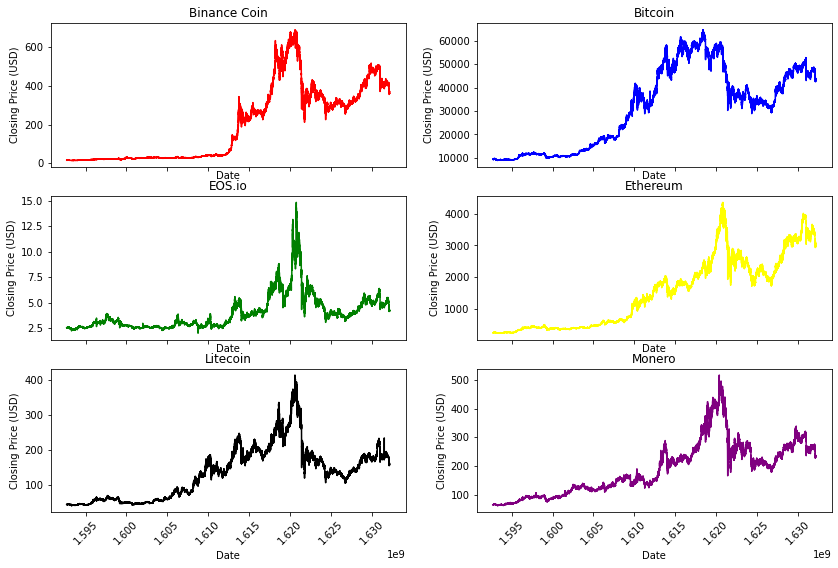

In [37]:
# visualize the close price of each cryptocurrencies
# Create the new figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,9), sharex=True)

# Rename the axes for ease of use
axs[0, 0].plot(new_BNB['Close'], color="red")
axs[0, 0].set_title('Binance Coin')
axs[0, 1].plot(new_BTC['Close'], color="blue")
axs[0, 1].set_title('Bitcoin')
axs[1, 0].plot(new_EOS['Close'], color="green")
axs[1, 0].set_title('EOS.io')
axs[1, 1].plot(new_ETH['Close'], color="yellow")
axs[1, 1].set_title('Ethereum')
axs[2, 0].plot(new_LTC['Close'], color="black")
axs[2, 0].set_title('Litecoin')
axs[2, 1].plot(new_XMR['Close'], color="purple")
axs[2, 1].set_title('Monero')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Closing Price (USD)')
    ax.tick_params(axis='x', labelrotation=45)

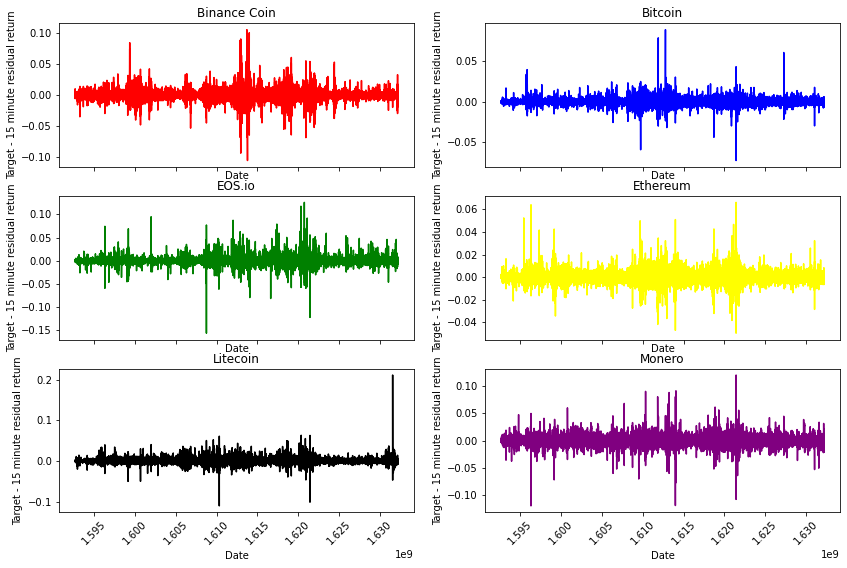

In [38]:
# visualize the target of each cryptocurrencies
# Create the new figure and subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,9), sharex=True)

# Rename the axes for ease of use
axs[0, 0].plot(new_BNB['Target'], color="red")
axs[0, 0].set_title('Binance Coin')
axs[0, 1].plot(new_BTC['Target'], color="blue")
axs[0, 1].set_title('Bitcoin')
axs[1, 0].plot(new_EOS['Target'], color="green")
axs[1, 0].set_title('EOS.io')
axs[1, 1].plot(new_ETH['Target'], color="yellow")
axs[1, 1].set_title('Ethereum')
axs[2, 0].plot(new_LTC['Target'], color="black")
axs[2, 0].set_title('Litecoin')
axs[2, 1].plot(new_XMR['Target'], color="purple")
axs[2, 1].set_title('Monero')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Target - 15 minute residual return')
    ax.tick_params(axis='x', labelrotation=45)

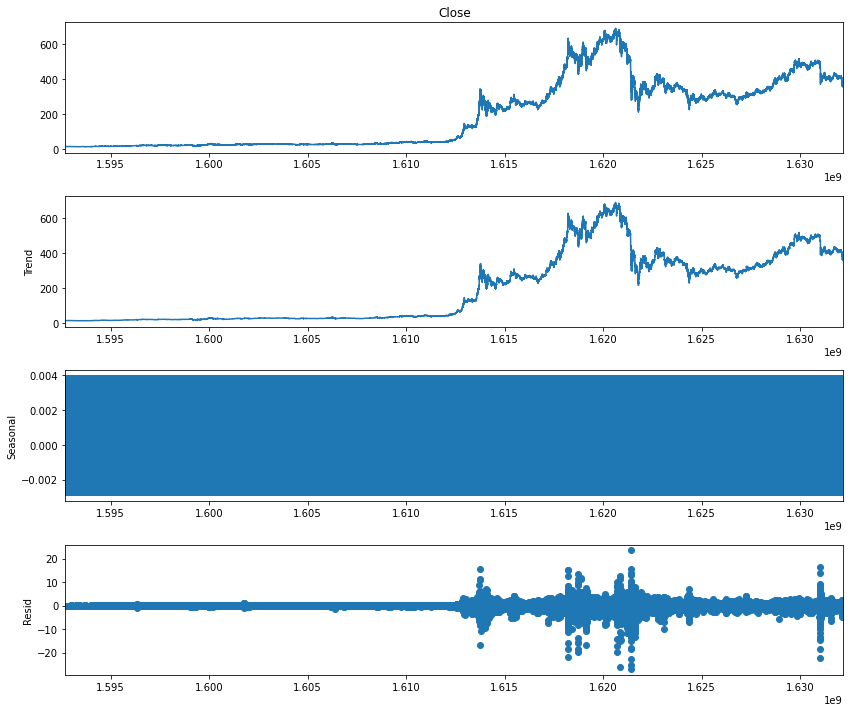

In [50]:
# Time Series Analysis
decomp = seasonal_decompose(new_BNB.Close, model='additive',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

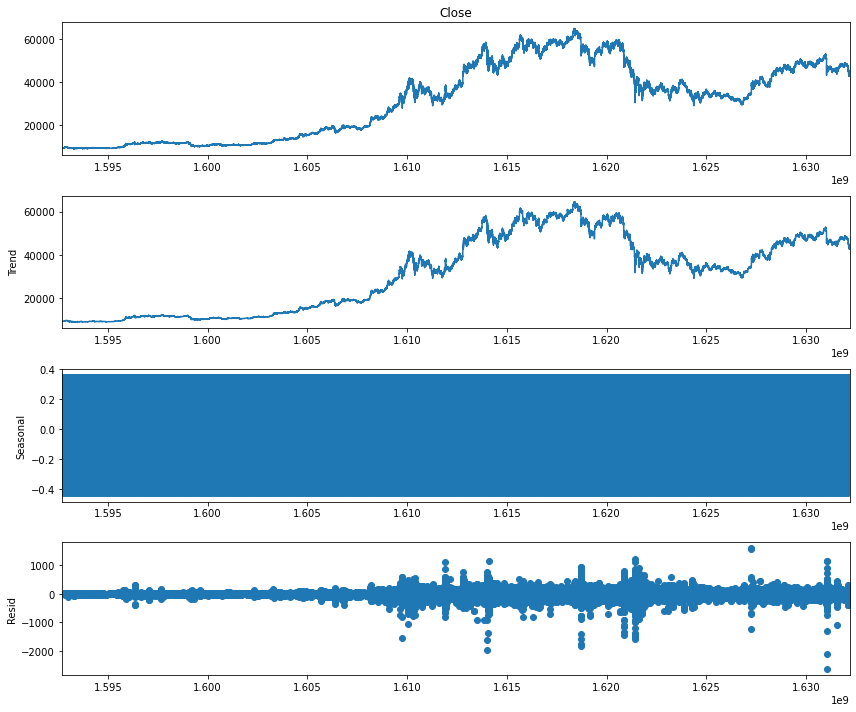

In [51]:
decomp = seasonal_decompose(new_BTC.Close, model='additive',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

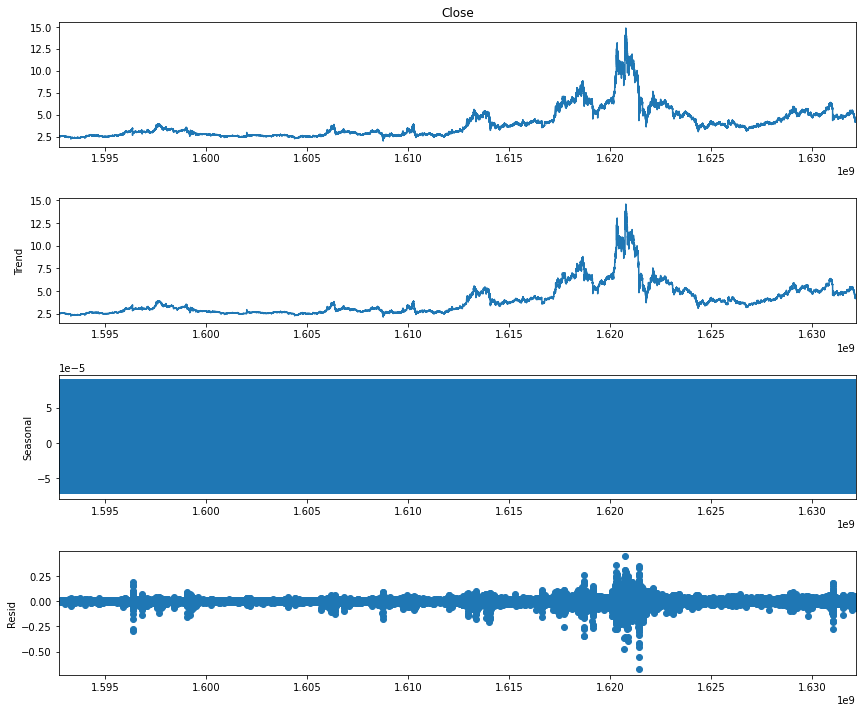

In [52]:
decomp = seasonal_decompose(new_EOS.Close, model='additive',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

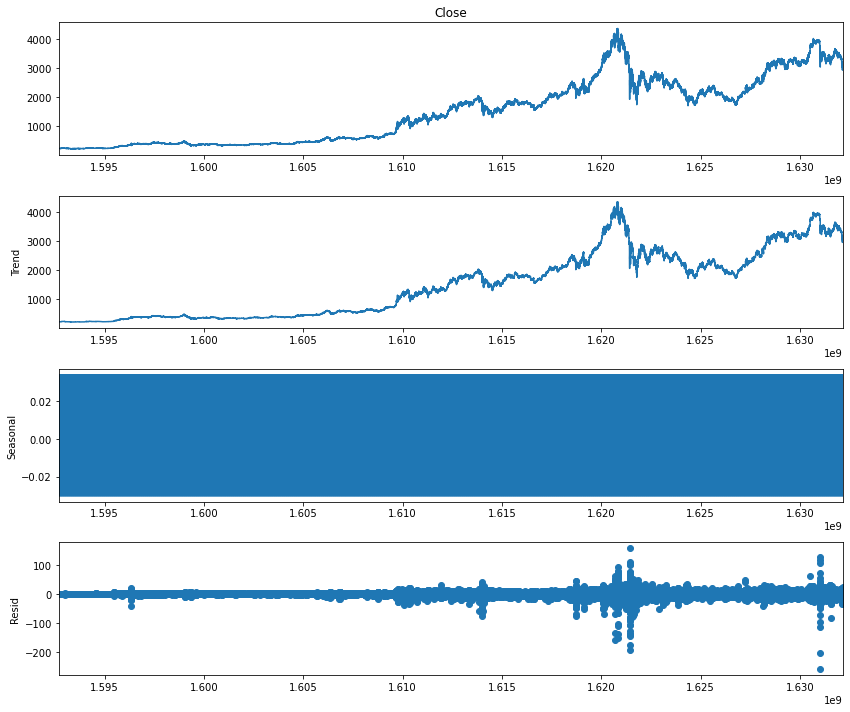

In [53]:
decomp = seasonal_decompose(new_ETH.Close, model='additive',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

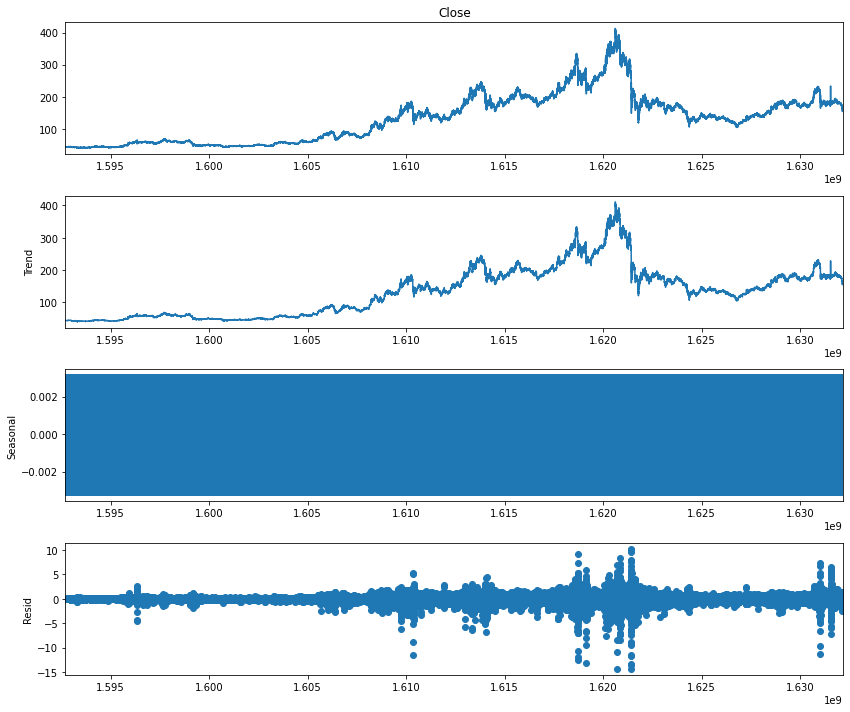

In [54]:
decomp = seasonal_decompose(new_LTC.Close, model='additive',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

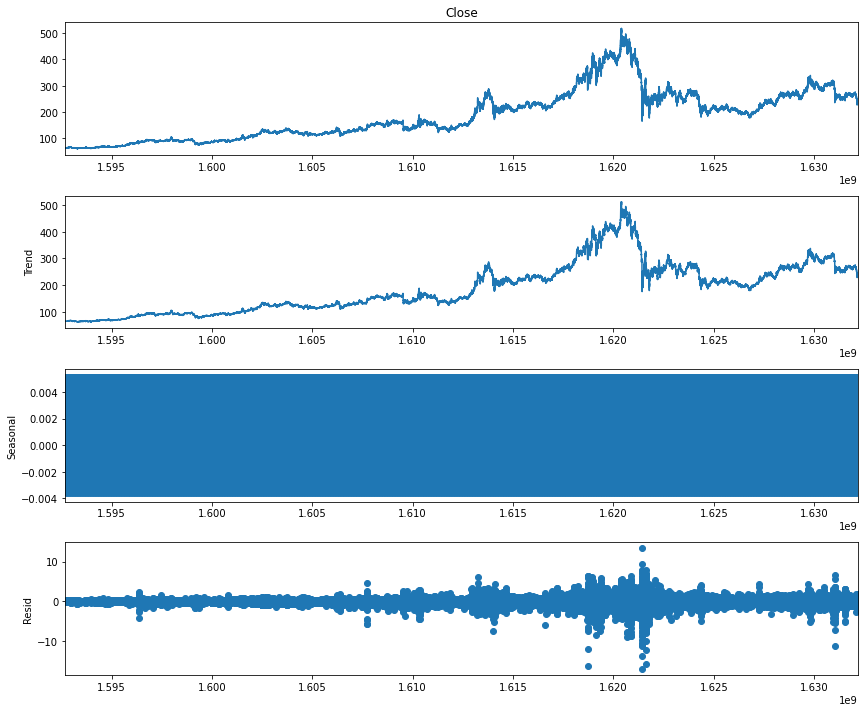

In [55]:
decomp = seasonal_decompose(new_XMR.Close, model='additive',period=12)
fig = decomp.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

In [56]:
# Candlestick chart
BNB_mini = new_BNB.iloc[-500:] # Select the last 500 minutes
fig = go.Figure(data=[go.Candlestick(x=BNB_mini.index,
                open=BNB_mini['Open'], high=BNB_mini['High'],
                low=BNB_mini['Low'], close=BNB_mini['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [57]:
BTC_mini = new_BTC.iloc[-1000:] # Select the last 1000 minutes
fig = go.Figure(data=[go.Candlestick(x=BTC_mini.index, open=BTC_mini['Open'], high=BTC_mini['High'], low=BTC_mini['Low'], close=BTC_mini['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [58]:
EOS_mini = new_EOS.iloc[-2000:] # Select the last 2000 minutes
fig = go.Figure(data=[go.Candlestick(x=EOS_mini.index, open=EOS_mini['Open'], high=EOS_mini['High'], low=EOS_mini['Low'], close=EOS_mini['Close'])])
fig.show()

In [59]:
ETH_mini = new_ETH.iloc[-5000:] # Select the last 5000 minutes
fig = go.Figure(data=[go.Candlestick(x=ETH_mini.index, open=ETH_mini['Open'], high=ETH_mini['High'], low=ETH_mini['Low'], close=ETH_mini['Close'])])
fig.show()

In [62]:
LTC_mini = new_LTC.iloc[-2000:] # Select the last 2000 minutes
fig = go.Figure(data=[go.Candlestick(x=LTC_mini.index, open=LTC_mini['Open'], high=LTC_mini['High'], low=LTC_mini['Low'], close=LTC_mini['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [63]:
XMR_mini = XMR.iloc[-1000:] # Select the last 1000 minutes
fig = go.Figure(data=[go.Candlestick(x=XMR_mini.index, open=XMR_mini['Open'], high=XMR_mini['High'], low=XMR_mini['Low'], close=XMR_mini['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## Preprocessing the Data

In [154]:
# Split training and testing data for Binance Coin
BNB_train = new_BNB[0:480960]# Start from 2020-06-21 00:01:00 to 2021-05-21 00:00:00
BNB_test = new_BNB[480960:] # Start from 2021-05-21 00:01:00 to 2021-09-21 00:00:00
X_BNB_train = BNB_train[["High","Low","VWAP"]]
X_BNB_test = BNB_test[["High","Low","VWAP"]]
y_BNB_train = BNB_train.Close
y_BNB_test = BNB_test.Close

In [155]:
# Split training and testing data for Bitcoin
BTC_train = new_BTC[0:480960]# Start from 2020-06-21 00:01:00 to 2021-05-21 00:00:00
BTC_test = new_BTC[480960:] # Start from 2021-05-21 00:01:00 to 2021-09-21 00:00:00
X_BTC_train = BTC_train[["High","Low","VWAP"]]
X_BTC_test = BTC_test[["High","Low","VWAP"]]
y_BTC_train = BTC_train.Close
y_BTC_test = BTC_test.Close

In [156]:
# Split training and testing data for EOS.io
EOS_train = new_EOS[0:480960]# Start from 2020-06-21 00:01:00 to 2021-05-21 00:00:00
EOS_test = new_EOS[480960:] # Start from 2021-05-21 00:01:00 to 2021-09-21 00:00:00
X_EOS_train = EOS_train[["High","Low","VWAP"]]
X_EOS_test = EOS_test[["High","Low","VWAP"]]
y_EOS_train = EOS_train.Close
y_EOS_test = EOS_test.Close

In [157]:
# Split training and testing data for Ethereum
ETH_train = new_ETH[0:480960]# Start from 2020-06-21 00:01:00 to 2021-05-21 00:00:00
ETH_test = new_ETH[480960:] # Start from 2021-05-21 00:01:00 to 2021-09-21 00:00:00
X_ETH_train = ETH_train[["High","Low","VWAP"]]
X_ETH_test = ETH_test[["High","Low","VWAP"]]
y_ETH_train = ETH_train.Close
y_ETH_test = ETH_test.Close

In [158]:
# Split trainng and testing data for Litecoin
LTC_train = new_LTC[0:480960]# Start from 2020-06-21 00:01:00 to 2021-05-21 00:00:00
LTC_test = new_LTC[480960:] # Start from 2021-05-21 00:01:00 to 2021-09-21 00:00:00
X_LTC_train = LTC_train[["High","Low","VWAP"]]
X_LTC_test = LTC_test[["High","Low","VWAP"]]
y_LTC_train = LTC_train.Close
y_LTC_test = LTC_test.Close

In [159]:
# Split training and testing data for Monero
XMR_train = new_XMR[0:480960]# Start from 2020-06-21 00:01:00 to 2021-05-21 00:00:00
XMR_test = new_XMR[480960:] # Start from 2021-05-21 00:01:00 to 2021-09-21 00:00:00
X_XMR_train = XMR_train[["High","Low","VWAP"]]
X_XMR_test = XMR_test[["High","Low","VWAP"]]
y_XMR_train = XMR_train.Close
y_XMR_test = XMR_test.Close

## Check shape of data

In [119]:
print(f'shape of X_EOS_train : {X_LTC_train.shape}\nshape of X_EOS_test : {X_EOS_test.shape}\nshape of y_EOS_train : {y_EOS_train.shape}\nshape of y_EOS_test : {y_EOS_test.shape}')

shape of X_EOS_train : (437760, 5)
shape of X_EOS_test : (220320, 5)
shape of y_EOS_train : (437760,)
shape of y_EOS_test : (220320,)


In [153]:
# Check timepoint
print(datetime.utcfromtimestamp(new_XMR.index[480960]))

2021-05-21 00:01:00


## Scale the training and testing data

In [160]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Scale the data for those eight cryptocurrencies
X_BNB_train_scaled = scaler.fit_transform(X_BNB_train)
X_BNB_test_scaled = scaler.fit_transform(X_BNB_test)

X_BTC_train_scaled = scaler.fit_transform(X_BTC_train)
X_BTC_test_scaled = scaler.fit_transform(X_BTC_test)

X_EOS_train_scaled = scaler.fit_transform(X_EOS_train)
X_EOS_test_scaled = scaler.fit_transform(X_EOS_test)

X_ETH_train_scaled = scaler.fit_transform(X_ETH_train)
X_ETH_test_scaled = scaler.fit_transform(X_ETH_test)

X_LTC_train_scaled = scaler.fit_transform(X_LTC_train)
X_LTC_test_scaled = scaler.fit_transform(X_LTC_test)

X_XMR_train_scaled = scaler.fit_transform(X_XMR_train)
X_XMR_test_scaled = scaler.fit_transform(X_XMR_test)

## Random Forest Regression

In [161]:
rf_model = RandomForestRegressor()

rf_model.fit(X_BNB_train_scaled,y_BNB_train)
y_pred_BNB = rf_model.predict(X_BNB_test_scaled)

rf_model.fit(X_BTC_train_scaled,y_BTC_train)
y_pred_BTC = rf_model.predict(X_BTC_test_scaled)

rf_model.fit(X_EOS_train_scaled,y_EOS_train)
y_pred_EOS = rf_model.predict(X_EOS_test_scaled)

rf_model.fit(X_ETH_train_scaled,y_ETH_train)
y_pred_ETH = rf_model.predict(X_ETH_test_scaled)

rf_model.fit(X_LTC_train_scaled,y_LTC_train)
y_pred_LTC = rf_model.predict(X_LTC_test_scaled)

rf_model.fit(X_XMR_train_scaled,y_XMR_train)
y_pred_XMR = rf_model.predict(X_XMR_test_scaled)

In [162]:
print(f"Test Score for Binance Coin: {r2_score(y_BNB_test,y_pred_BNB):.3f}")
print(f"Test Score for Bitcoin: {r2_score(y_BTC_test,y_pred_BTC):.3f}")
print(f"Test Score for EOS.io: {r2_score(y_EOS_test,y_pred_EOS):.3f}")
print(f"Test Score for Ethereum: {r2_score(y_ETH_test,y_pred_ETH):.3f}")
print(f"Test Score for Litecoin: {r2_score(y_LTC_test,y_pred_LTC):.3f}")
print(f"Test Score for Monero: {r2_score(y_XMR_test,y_pred_XMR):.3f}")

Test Score for Binance Coin: -11.480
Test Score for Bitcoin: -5.822
Test Score for EOS.io: -1.062
Test Score for Ethereum: -6.594
Test Score for Litecoin: -4.511
Test Score for Monero: -6.696


In [126]:
print("Binance Coin Prediction")
print(f"MSE : {mean_absolute_error(y_BNB_test, y_pred_BNB):.3f}")
print(f"MAE : {mean_squared_error(y_BNB_test,y_pred_BNB):.3f}")

print("Bitcoin Prediction")
print(f"MSE : {mean_absolute_error(y_BTC_test, y_pred_BTC):.3f}")
print(f"MAE : {mean_squared_error(y_BTC_test,y_pred_BTC):.3f}")

print("EOS.io Prediction")
print(f"MSE : {mean_absolute_error(y_EOS_test, y_pred_EOS):.3f}")
print(f"MAE : {mean_squared_error(y_EOS_test,y_pred_EOS):.3f}")

print("Ethereum Prediction")
print(f"MSE : {mean_absolute_error(y_ETH_test, y_pred_ETH):.3f}")
print(f"MAE : {mean_squared_error(y_ETH_test,y_pred_ETH):.3f}")

print("Litecoin Prediction")
print(f"MSE : {mean_absolute_error(y_LTC_test, y_pred_LTC):.3f}")
print(f"MAE : {mean_squared_error(y_LTC_test,y_pred_LTC):.3f}")

print("Monero Prediction")
print(f"MSE : {mean_absolute_error(y_XMR_test, y_pred_XMR):.3f}")
print(f"MAE : {mean_squared_error(y_XMR_test,y_pred_XMR):.3f}")

Binance Coin Prediction
MSE : 300.499
MAE : 90656.949
Bitcoin Prediction
MSE : 15899.481
MAE : 320767479.895
EOS.io Prediction
MSE : 2.088
MAE : 4.940
Ethereum Prediction
MSE : 1883.839
MAE : 3554777.242
Litecoin Prediction
MSE : 78.922
MAE : 6263.021
Monero Prediction
MSE : 136.468
MAE : 18648.577


In [163]:
from sklearn.inspection import permutation_importance
rf_model.feature_importances_

array([4.95749663e-05, 3.96788666e-06, 9.99946457e-01])

In [164]:
# View the feature scores
feature_scores = pd.Series(rf_model.feature_importances_, index=X_BNB_train.columns).sort_values(ascending=False)
feature_scores

VWAP    0.999946
High    0.000050
Low     0.000004
dtype: float64

<AxesSubplot:xlabel='timestamp'>

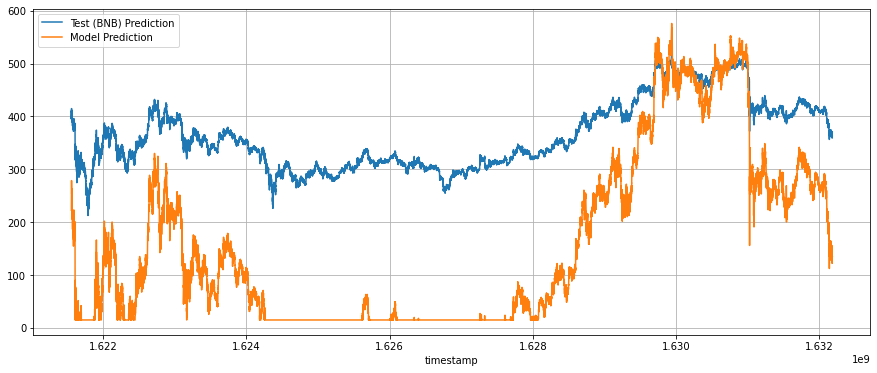

In [166]:
pred_BNB = pd.DataFrame({"Test (BNB) Prediction":y_BNB_test,"Model Prediction":y_pred_BNB})

pred_BNB.plot(grid=True, figsize=(15,6))

<AxesSubplot:xlabel='timestamp'>

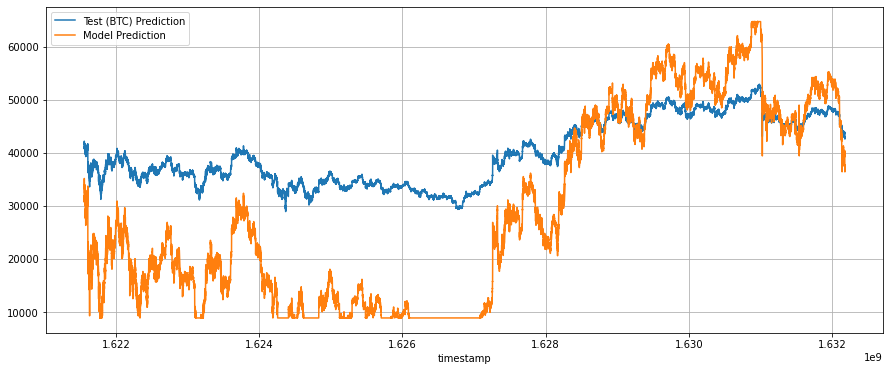

In [167]:
pred_BTC = pd.DataFrame({"Test (BTC) Prediction":y_BTC_test,"Model Prediction":y_pred_BTC})

pred_BTC.plot(grid=True, figsize=(15,6))

<AxesSubplot:xlabel='timestamp'>

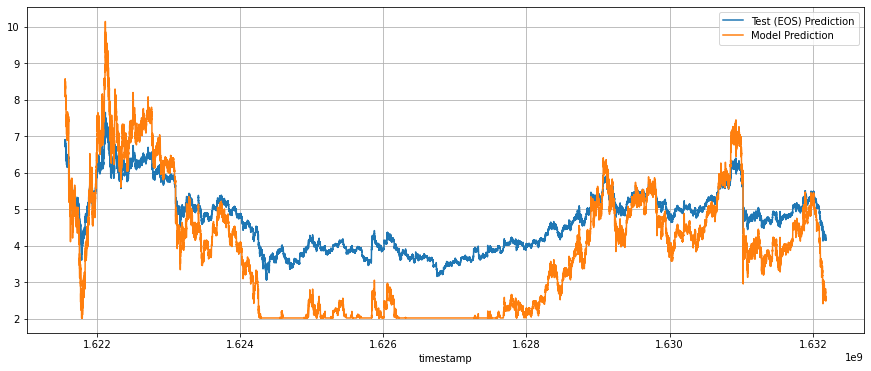

In [168]:
pred_EOS = pd.DataFrame({"Test (EOS) Prediction":y_EOS_test,"Model Prediction":y_pred_EOS})

pred_EOS.plot(grid=True, figsize=(15,6))

<AxesSubplot:xlabel='timestamp'>

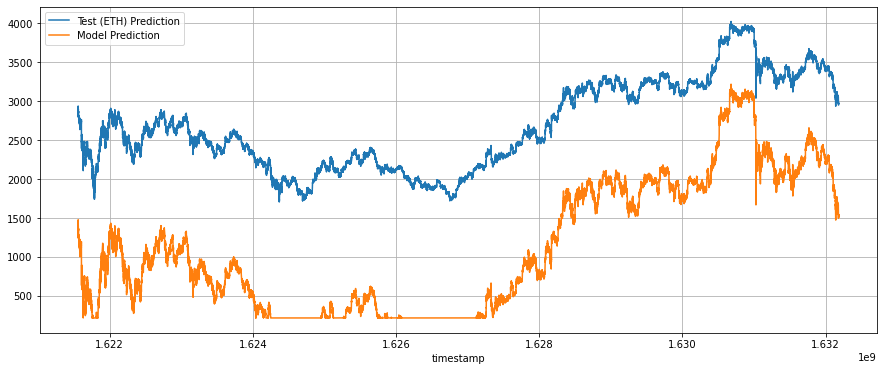

In [169]:
pred_ETH = pd.DataFrame({"Test (ETH) Prediction":y_ETH_test,"Model Prediction":y_pred_ETH})

pred_ETH.plot(grid=True, figsize=(15,6))

<AxesSubplot:xlabel='timestamp'>

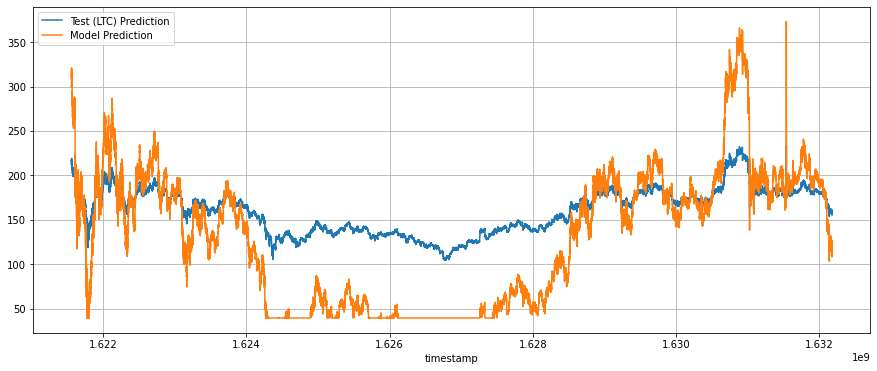

In [170]:
pred_LTC = pd.DataFrame({"Test (LTC) Prediction":y_LTC_test,"Model Prediction":y_pred_LTC})

pred_LTC.plot(grid=True, figsize=(15,6))

<AxesSubplot:xlabel='timestamp'>

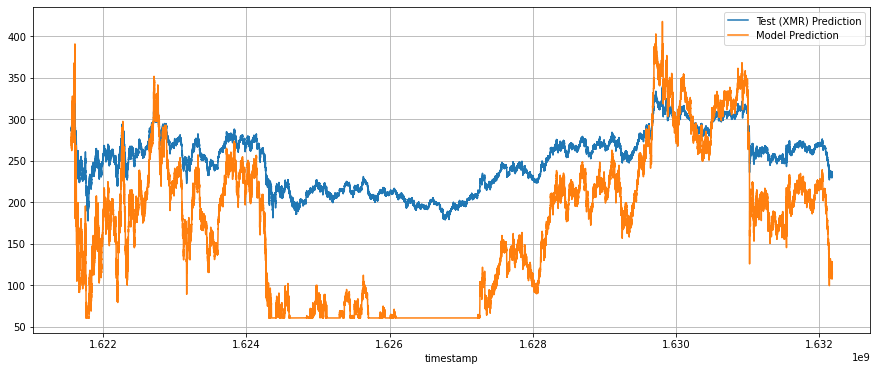

In [171]:
pred_XMR = pd.DataFrame({"Test (XMR) Prediction":y_XMR_test,"Model Prediction":y_pred_XMR})

pred_XMR.plot(grid=True, figsize=(15,6))

## Connect to SQL Database